In [2]:
# ###############
# 主成分分量方差和的比例对数据重构的作用
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition

In [3]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [4]:
# 下载人脸数据集
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)

In [5]:
# 对样本数据去均值
faces = dataset.data
n_samples, n_features = faces.shape
# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [6]:
# 显示图像，每一行表示一个样本
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [7]:
# PCA类
estimators = [
   ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),
]

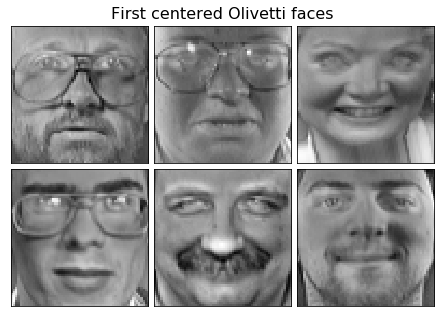

In [8]:
# 绘制原始人脸图
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

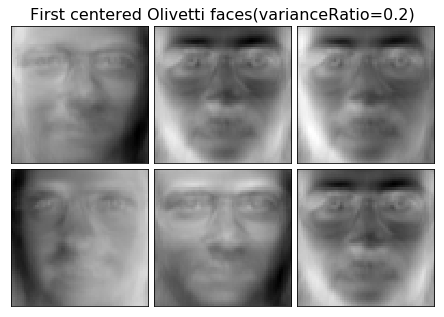

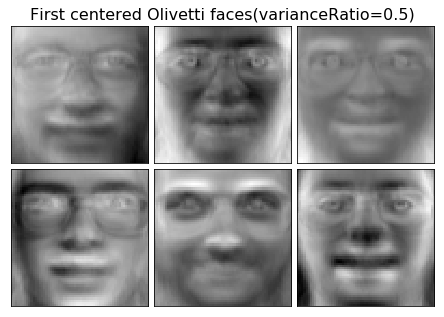

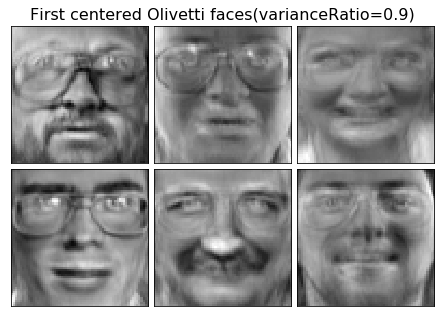

In [26]:
# 当n_components为小数时，输出n_components与数据重构图的关系
varianceRatio = [0.2,0.5,0.9]
for component in varianceRatio:
    estimator = decomposition.PCA(n_components = component,whiten=True)
    # 计算降维后的数据集
    data1 = estimator.fit_transform(faces_centered)
    # 数字转换为字符串
    str1 = '(varianceRatio=%.1f)' %component
    str ='First centered Olivetti faces' + str1
    # 重构原始数据集
    data2 = estimator.inverse_transform(data1)
    plot_gallery(str, data2[:n_components]) 